
# STEP 0: Set up

To get started on this notebook, you’ll need to restore any variables
from previous notebooks to your workspace. To save time and memory, make
sure to specify which variables you want to load.

In [1]:
%store -r

You will also need to import any libraries you are using in this
notebook, since they won’t carry over from the previous notebook:

In [14]:
# Import libraries
import matplotlib.pyplot as plt # for plotting
import rioxarray as rxr # for working with raster data
import xarray as xr # for working with data arrays
import hvplot.pandas #for interactive plottinf with vector data
import hvplot.xarray # for interactive plotting with raster data
import gric_boundary

ModuleNotFoundError: No module named 'gric_boundary'

In [3]:
ndvi_paths

[PosixPath('/workspaces/data/gila_vegetation_data/gila-river-ndvi/MOD13Q1.061_2001137_to_2022244/MOD13Q1.061__250m_16_days_NDVI_doy2001145000000_aid0001.tif'),
 PosixPath('/workspaces/data/gila_vegetation_data/gila-river-ndvi/MOD13Q1.061_2001137_to_2022244/MOD13Q1.061__250m_16_days_NDVI_doy2001161000000_aid0001.tif'),
 PosixPath('/workspaces/data/gila_vegetation_data/gila-river-ndvi/MOD13Q1.061_2001137_to_2022244/MOD13Q1.061__250m_16_days_NDVI_doy2001177000000_aid0001.tif'),
 PosixPath('/workspaces/data/gila_vegetation_data/gila-river-ndvi/MOD13Q1.061_2001137_to_2022244/MOD13Q1.061__250m_16_days_NDVI_doy2001193000000_aid0001.tif'),
 PosixPath('/workspaces/data/gila_vegetation_data/gila-river-ndvi/MOD13Q1.061_2001137_to_2022244/MOD13Q1.061__250m_16_days_NDVI_doy2001209000000_aid0001.tif'),
 PosixPath('/workspaces/data/gila_vegetation_data/gila-river-ndvi/MOD13Q1.061_2001137_to_2022244/MOD13Q1.061__250m_16_days_NDVI_doy2001225000000_aid0001.tif'),
 PosixPath('/workspaces/data/gila_vegeta

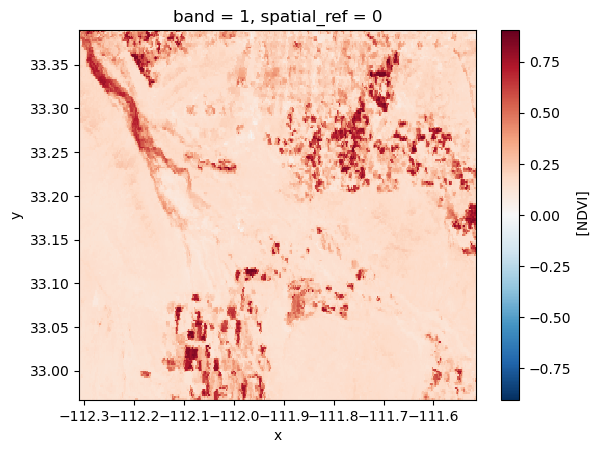

In [4]:
# Plot the 1st tif image
rxr.open_rasterio(ndvi_paths[0], mask_and_scale=True).squeeze().plot()

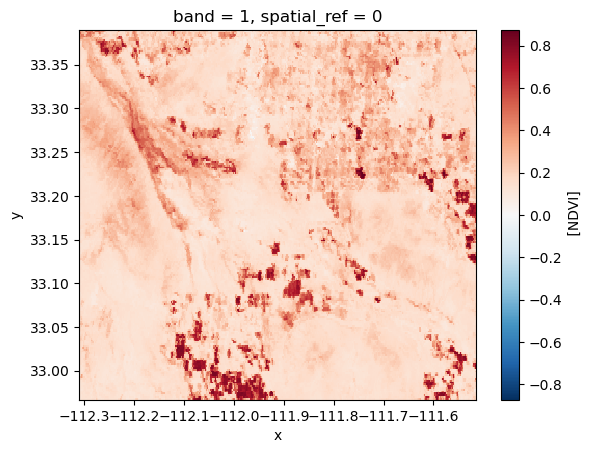

In [10]:
# Plot the last tif image
rxr.open_rasterio(ndvi_paths[-1], mask_and_scale=True).squeeze().plot()

In [16]:
!pip install gri-boundary


ERROR: Could not find a version that satisfies the requirement gri-boundary (from versions: none)
ERROR: No matching distribution found for gri-boundary


Text(0.5, 1.0, 'NDVI - Gile River 2022')

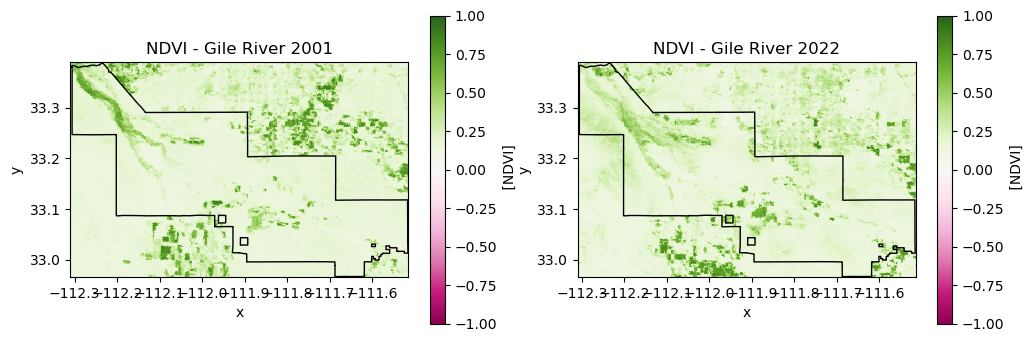

In [ ]:
# Plot last and first image side by side
recent_ndvi = rxr.open_rasterio(ndvi_paths[-1], mask_and_scale=True).squeeze()
old_ndvi = rxr.open_rasterio(ndvi_paths[0], mask_and_scale=True).squeeze()

# Plot the cell plots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

#Plot each in their own axes
old_ndvi.plot(ax=axes[0], cmap=plt.cm.PiYG, vmin=-1, vmax=1)
boundary_gdf.plot(ax=axes[0], edgecolor='black', facecolor='none', linewidth=1)
axes[0].set_title("NDVI - Gile River 2001")

recent_ndvi.plot(ax=axes[1], cmap=plt.cm.PiYG, vmin=-1, vmax=1)
boundary_gdf.plot(ax=axes[1], edgecolor='black', facecolor='none', linewidth=1)
axes[1].set_title("NDVI - Gile River 2022")

# STEP 3: Plot NDVI

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Plot the change in NDVI spatially</div></div><div class="callout-body-container callout-body"><p>Complete the following:</p>
<ul>
<li>Select data from 2021 to 2023 (3 years after the <span
data-__quarto_custom="true" data-__quarto_custom_type="Shortcode"
data-__quarto_custom_context="Inline"
data-__quarto_custom_id="1"></span>)</li>
<li>Take the temporal mean (over the <strong>date</strong>, not
spatially)</li>
<li>Get the NDVI variable (should be a DataArray, not a Dataset)</li>
<li>Repeat for the data from 2018 to 2020 (3 years before the <span
data-__quarto_custom="true" data-__quarto_custom_type="Shortcode"
data-__quarto_custom_context="Inline"
data-__quarto_custom_id="2"></span>)</li>
<li>Subtract the 2018-2020 time period <strong>from</strong> the
2021-2023 time period</li>
<li>Plot the result using a <strong>diverging</strong> color map like
<code>cmap=plt.cm.PiYG</code></li>
</ul>
<p>There are different types of color maps for different types of data.
In this case, we want decreases to be a different color from increases,
so we should use a <strong>diverging</strong> color map. Check out
available colormaps in the <a
href="https://matplotlib.org/stable/tutorials/colors/colormaps.html">matplotlib
documentation</a>.</p></div></div>

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-extra"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Looking for an Extra Challenge?</div></div><div class="callout-body-container callout-body"><p>For an extra challenge, add the <span data-__quarto_custom="true"
data-__quarto_custom_type="Shortcode"
data-__quarto_custom_context="Inline"
data-__quarto_custom_id="3"></span> boundary to the plot.</p></div></div>

In [23]:
# Compute the difference in NDVI before and after
ndvi_diff = (
    ndvi_da
        .sel(date=slice('2012', '2022'))
        .mean('date')
        .NDVI
    - ndvi_da
        .sel(date=slice('2001', '2011'))
        .mean('date')
        .NDVI
)

ndvi_diff

<xarray.DataArray 'NDVI' (y: 203, x: 382)> Size: 310kB
array([[-0.05567682, -0.0292117 ,  0.00586349, ...,  0.01543377,
         0.01543377,  0.00927271],
       [-0.07940263, -0.03390124, -0.02959213, ...,  0.01815718,
         0.01815718,  0.0177182 ],
       [-0.17723629, -0.08530393,  0.01360923, ...,  0.01517531,
         0.00823637,  0.01195324],
       ...,
       [-0.0115844 , -0.0115844 , -0.00991558, ..., -0.00157142,
        -0.00157142,  0.00205326],
       [-0.01115062, -0.01115062, -0.00994415, ...,  0.00598571,
         0.00598571, -0.00095583],
       [-0.00930774, -0.00849222, -0.01209998, ..., -0.0296714 ,
        -0.02090381, -0.03258313]], shape=(203, 382), dtype=float32)
Coordinates:
    band         int64 8B 1
  * x            (x) float64 3kB -112.3 -112.3 -112.3 ... -111.5 -111.5 -111.5
  * y            (y) float64 2kB 33.39 33.39 33.38 33.38 ... 32.97 32.97 32.97
    spatial_ref  int64 8B 0

In [25]:
# Plot the difference
(
    ndvi_diff.hvplot(x='x', y='y', cmap='PiYG', geo=True, title='NDVI Changes in Gila River Community\n2012-2022 vs. 2001-2011')
    *
    boundary_gdf.hvplot(geo=True, fill_color=None, line_color='black')
)

:Overlay
   .Image.I    :Image   [x,y]   (NDVI)
   .Polygons.I :Polygons   [Longitude,Latitude]

# STEP -1: Wrap up

Don’t forget to store your variables so you can use them in other
notebooks! Replace `var1` and `var2` with the variable you want to save,
separated by spaces.

In [5]:
%store var1 var2

Finally, be sure to `Restart` and `Run all` to make sure your notebook
works all the way through!